# Stock Price Prediction using Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the CSV file and export data into a Dataframe

In [ ]:
data = pd.read_csv('/content/NSE-TATAGLOBAL.csv').set_index('Date')
data.sort_index(inplace=True)
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


### Explore the Data

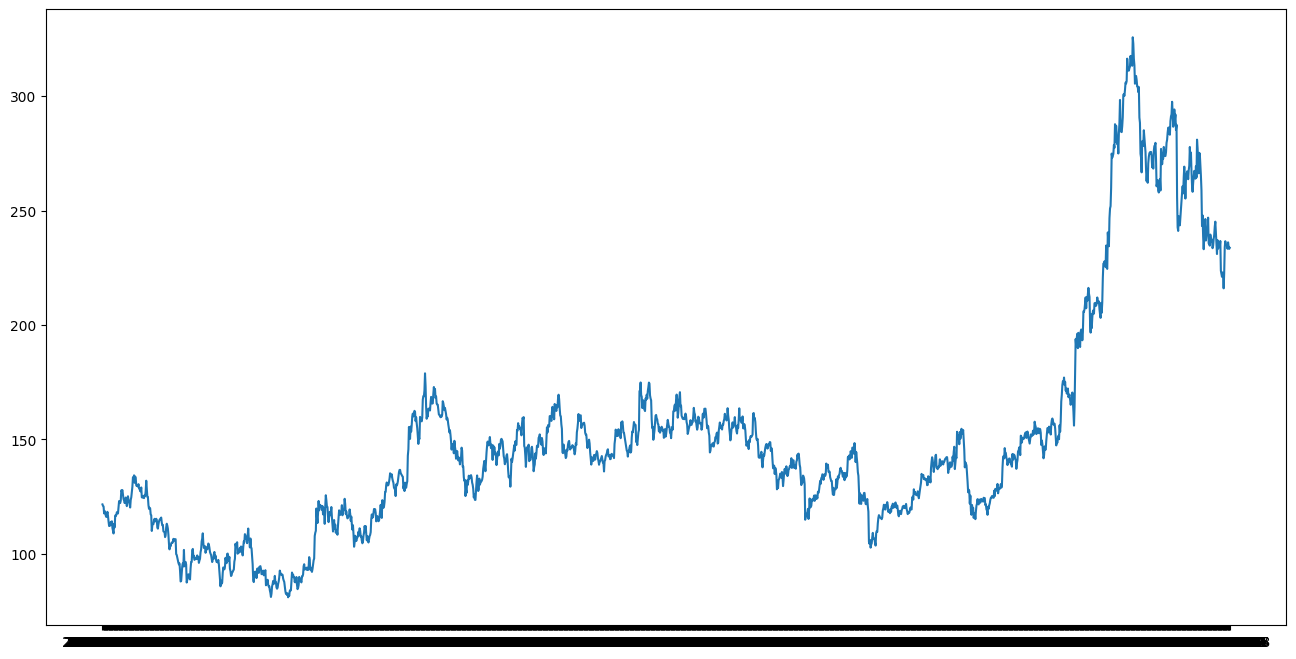

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

 ### Classification problem : Buy(+1) or sell(-1) the stock

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

### Input features to predict whether customer should buy or sell the stock

In [ ]:
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45


### Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is Y for classification task

In [ ]:
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

### Implementation of KNN classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

# Using GridSearch to find the best parameter
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# Fit the model
model.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Train data accuracy : %.2f' %accuracy_train)
print('Test data accuracy : %.2f' %accuracy_test)

Train data accuracy : 0.66
Test data accuracy : 0.53


In [ ]:
predictions_classification = model.predict(X_test)
actual_predicted_data = pd.DataFrame({'Actual Class' : Y_test, 'Predicted Class' : predictions_classification})
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,-1,-1
2,-1,1
3,-1,-1
4,1,-1
5,-1,1
6,-1,1
7,-1,-1
8,1,-1
9,1,1


### Regression problem : KNN

In [ ]:
Y = data['Close']

### Implementation of KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.25, random_state=44)

# Using GridSearch to find the best parameter
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Fit the model
model_reg.fit(X_train_reg, Y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
rms = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predictions)), 2)))

valid = pd.DataFrame({'Actual Close' : Y_test_reg, 'Predicted Close Value' : predictions})
valid.head(10)

,Actual Close,Predicted Close Value
Date,,
2014-12-09,154.85,135.513333
2013-09-06,147.00,183.843333
2016-05-03,119.45,133.666667
2014-01-22,149.85,132.730000
2013-07-05,145.15,136.973333
2014-04-29,151.30,137.473333
2016-09-14,137.45,139.996667
2016-05-09,118.75,142.233333
2015-09-22,123.90,139.160000
